In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
type-1 grain file header:
# Header: Project1::Mg4Al_U2 iE=0 cleaned-NOC cleaned-Dil::All data, tolerance=5deg::Grain Size   3/1/2021
# 
# Partition Formula: 
# Grain Tolerance Angle: 5.00
# Minimum Grain Size: 2
# Minimum Anti-Grain Size: 2
# Minimum Confidence Index: 0.00
# Multiple Rows Requirement: Off
# Anti-Grain Multiple Rows Requirement: Off
# Column 1-3: phi1, PHI, phi2 (orientation of point in radians)
# Column 4-5: x, y (coordinates of point in microns)
# Column 6:   IQ (image quality)
# Column 7:   CI (confidence index)
# Column 8:   Fit (degrees)
# Column 9:   Grain ID (integer)
# Column 10:  edge (1 for grains at edges of scan and 0 for interior grains)
# Column 11:  phase name

type-2 grain file header:
# Header: Project1::Mg4Al_U2 iE=0 cleaned-NOC cleaned-Dil::All data, tolerance=5deg::Grain Size   3/1/2021
# 
# Partition Formula: 
# Grain Tolerance Angle: 5.00
# Minimum Grain Size: 2
# Minimum Anti-Grain Size: 2
# Minimum Confidence Index: 0.00
# Multiple Rows Requirement: Off
# Anti-Grain Multiple Rows Requirement: Off
# Column 1: Integer identifying grain
# Column 2-4: Average orientation (phi1, PHI, phi2) in degrees
# Column 5-7: Average orientation (phi1, PHI, phi2) in radians
# Column 8-9: Average Position (x, y) in microns
# Column 10: Average Image Quality (IQ)
# Column 11: Average Confidence Index (CI)
# Column 12: Average Fit (degrees)
# Column 13: An integer identifying the phase
#           0 -  Magnesium
# Column 14: Edge grain (1) or interior grain (0)
# Column 15: Number of measurement points in the grain
# Column 16: Area of grain in square microns
# Column 17: Diameter of grain in microns
# Column 18: ASTM grain size
# Column 19: Aspect ratio of ellipse fit to grain
# Column 20: Length of major axis of ellipse fit to grain in microns
# Column 21: Length of minor axis of ellipse fit to grain in microns
# Column 22: Orientation (relative to the horizontal) of major axis of ellipse fit to grain in degrees
# Column 23: Grain ellipticity
# Column 24: Grain circularity
# Column 25: Maximmum Feret diameter# Column 26: Minimum Feret diameter
# Column 27: Average orientation spread in grain (average misorientation of all point pairs)
# Column 28: Average misorientation in grain (average misorientation of neighboring point pairs)
# Column 29-...: Number of grains neighboring current grain and their grain IDs (Count id1 id2 id3 ...)
# Column 30-...: Number of grains neighboring current grain and their grain IDs (Count id1 (w1) id2 (w2) id3 (w3) ...)
'''

f1 = 'data/Mg4Al_U2 grain_file_type_1 iE=0.txt'
f2 = 'data/Mg4Al_U2 grain_file_type_2 iE=0.txt'

# open file and read as text
with open(f1) as f:
    t1 = f.readlines()

# determine number of header rows
number_of_header_lines = 0
while t1[number_of_header_lines ][0]=='#':
    number_of_header_lines  += 1

# skip headers, read data, assign column names
column_names = ['phi1','phi','phi2','x','y','IQ','CI','Fit','ID','Edge','phase']
df = pd.read_csv(f1, delimiter='\s+', header=None, names=column_names, skiprows=number_of_header_lines)

# determine 2D dimension of data
nx = df['x'].nunique()
ny = df['y'].nunique()

# extract columns and reshape into matrices
phi1 = np.array(df['phi1']).reshape((nx,ny))
phi = np.array(df['phi']).reshape((nx,ny))
phi2 = np.array(df['phi2']).reshape((nx,ny))
x = np.array(df['x']).reshape((nx,ny))
y = np.array(df['y']).reshape((nx,ny))
IQ = np.array(df['IQ']).reshape((nx,ny))
CI = np.array(df['CI']).reshape((nx,ny))
Fit = np.array(df['Fit']).reshape((nx,ny))
ID = np.array(df['ID']).reshape((nx,ny))
Edge = np.array(df['Edge']).reshape((nx,ny))
phase = np.array(df['phase']).reshape((nx,ny))

# with open(f2) as f:
#     t2 = f.readlines()

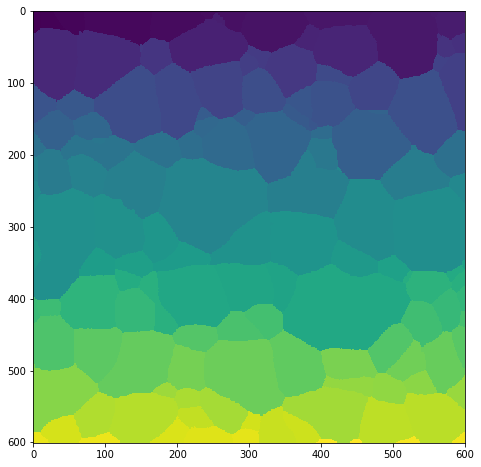

In [82]:
# plot the map
fig = plt.figure(figsize=(6,6))
axes = fig.add_axes([0,0,1,1])
axes.pcolor(x, y, ID)
axes.axis('equal')
plt.gca().invert_yaxis()